#Importamos PANDAS

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# de ahi subimos el archivo a analizar
### -si usas VSC, descargar el archivo en el github y ponerlo en la carpeta raiz y usar read_csv. si es Google Colab, usar los codigos sombreados, solo descomentar

In [ ]:
# csv descargado de "https://www.kaggle.com/datasets/sazidthe1/global-unemployment-data"
#from google.colab import files
#uploaded = files.upload()

Saving global_unemployment_data.csv to global_unemployment_data.csv


#Despues, en la variable df, cargamos los datos del archivo, mostramos los primeros 5 valores para reconocer el contenido del archivo

In [2]:
df = pd.read_csv("global_unemployment_data.csv")
df.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


#Con .info() conoceremos dos detalles generales del archivo, tambien podemos ver si existenten archivos nulos y de ahi tomar la desicion de como tratar esos valores.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1128 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


#Tratamiendo de valores Nulos
## Podemos quitar las filas con valores nulos, no es muy recomendado en ciertos casos.
## Rellenamos los Nulos con la media de cada columna, para mantener la cantidad original de filas.
## Rellenamos los Nulos con la última vista valida(fill), siempre y cuando tengan logica la secuencia.

#En este caso rellenaremos con la media los valores nulos y verificaremos la existencia de algun nulo.

In [19]:
for year in ["2022", "2023", "2024"]:
    df[year] = df[year].fillna(df[year].mean())

# Reemplaza con la media
print("📌 Valores nulos después del proceso:\n", df.isnull().sum())
df.info()

📌 Valores nulos después del proceso:
 country_name      0
indicator_name    0
sex               0
age_group         0
age_categories    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
2024              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 n

#Pasaremos al Análisis exploratorio de datos (EDA)
### 1 veremos distribucion de empleo --> Histograma
### 2 Comparación entre países
### 3 Evolución del desempleo

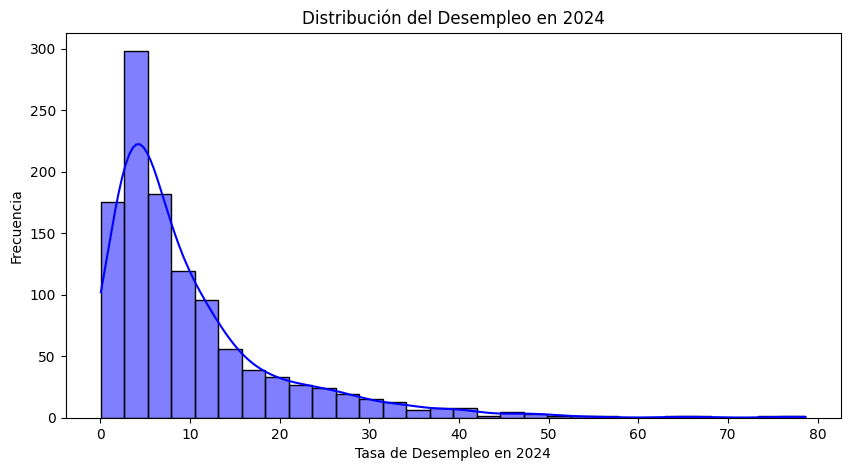

In [20]:

plt.figure(figsize=(10,5))
sns.histplot(df["2024"], bins=30, kde=True, color="blue")
plt.xlabel("Tasa de Desempleo en 2024")
plt.ylabel("Frecuencia")
plt.title("Distribución del Desempleo en 2024")
plt.show()

# Los 10 países con mas desempleo en el 2024

C:\Users\Christian\AppData\Local\Temp\ipykernel_9204\1105664547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")


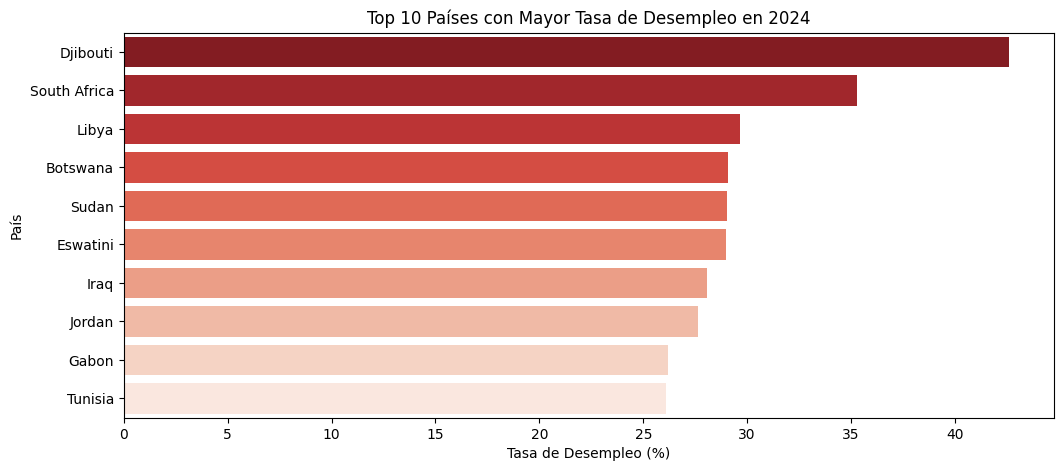

In [21]:
# Ordenar por desempleo en 2024
top_countries = df.groupby("country_name")["2024"].mean().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")
plt.xlabel("Tasa de Desempleo (%)")
plt.ylabel("País")
plt.title("Top 10 Países con Mayor Tasa de Desempleo en 2024")
plt.show()

# Evolicion del desempleo desde el 2014 - 2024

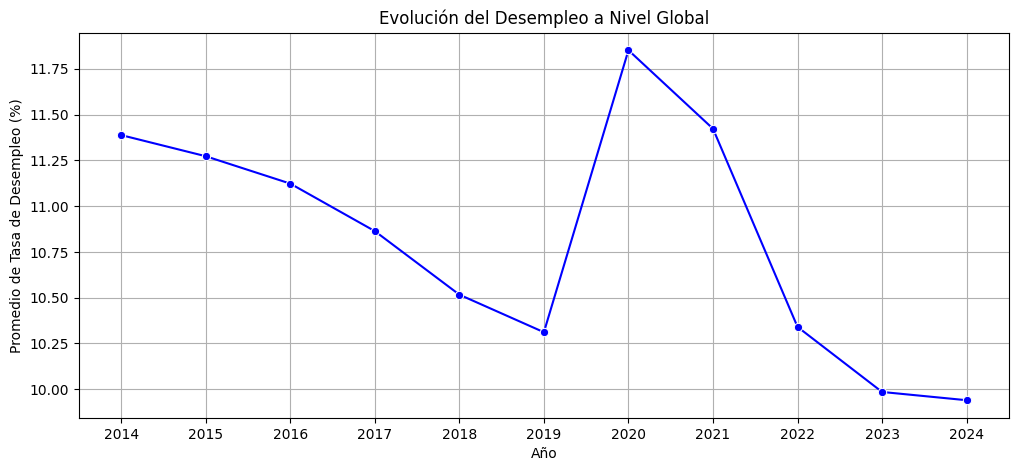

In [22]:
# Seleccionar solo columnas de años
year_columns = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]
unemployment_trend = df[year_columns].mean()

# Gráfico de línea
plt.figure(figsize=(12,5))
sns.lineplot(x=unemployment_trend.index, y=unemployment_trend.values, marker="o", color="blue")
plt.xlabel("Año")
plt.ylabel("Promedio de Tasa de Desempleo (%)")
plt.title("Evolución del Desempleo a Nivel Global")
plt.grid(True)
plt.show()

# Países con menos tasa de desempleo

C:\Users\Christian\AppData\Local\Temp\ipykernel_9204\3156795924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_countries.values, y=bottom_countries.index, palette="Greens_r")


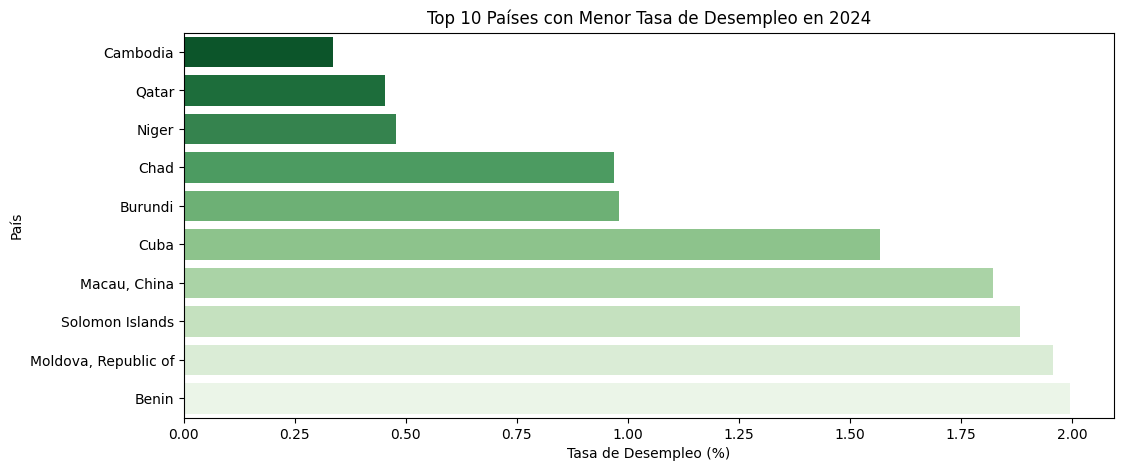

In [23]:
# Ordenar por desempleo en 2024 (de menor a mayor)
bottom_countries = df.groupby("country_name")["2024"].mean().sort_values(ascending=True).head(10)

# Gráfico de barras
plt.figure(figsize=(12,5))
sns.barplot(x=bottom_countries.values, y=bottom_countries.index, palette="Greens_r")
plt.xlabel("Tasa de Desempleo (%)")
plt.ylabel("País")
plt.title("Top 10 Países con Menor Tasa de Desempleo en 2024")
plt.show()

# Comparacion de desempleo entre Hombres y Mujeres

### Visualizar con un grafico de barras

C:\Users\Christian\AppData\Local\Temp\ipykernel_9204\1031777131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_unemployment.index, y=gender_unemployment.values, palette="coolwarm")


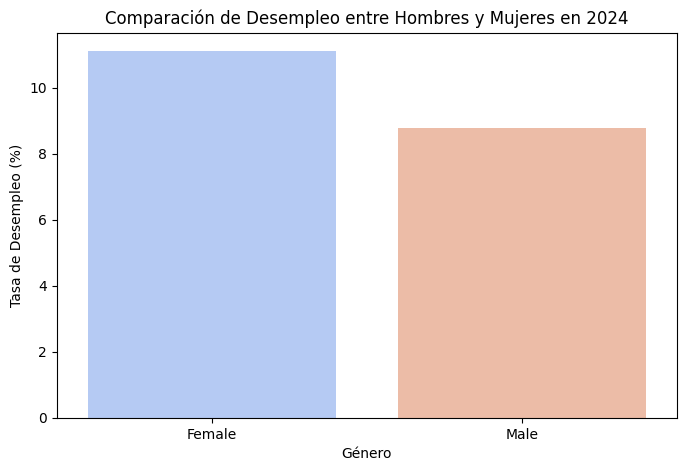

In [24]:
gender_unemployment = df.groupby("sex")["2024"].mean()

# Gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=gender_unemployment.index, y=gender_unemployment.values, palette="coolwarm")
plt.xlabel("Género")
plt.ylabel("Tasa de Desempleo (%)")
plt.title("Comparación de Desempleo entre Hombres y Mujeres en 2024")
plt.show()

# Análisis de desempleo por Edad

C:\Users\Christian\AppData\Local\Temp\ipykernel_9204\2783675507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_unemployment.index, y=age_unemployment.values, palette="viridis")


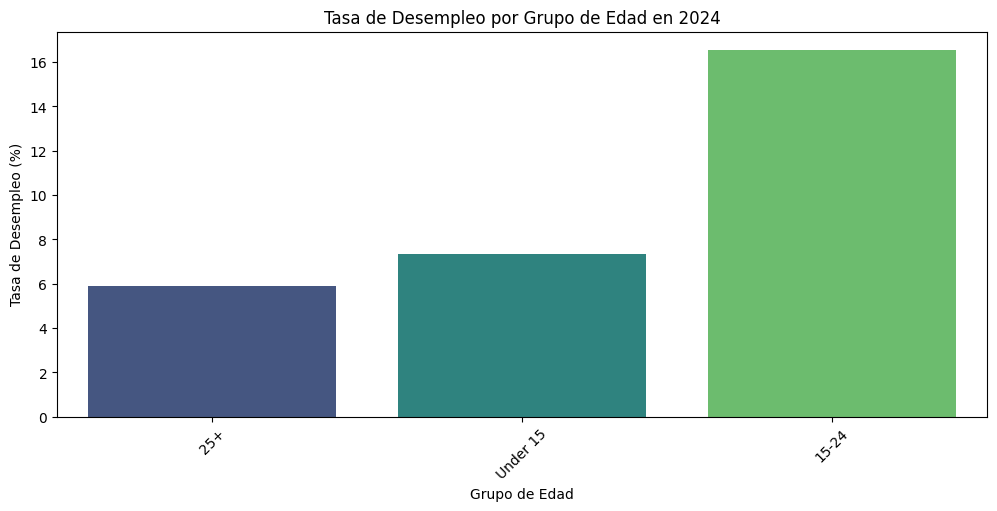

In [25]:
age_unemployment = df.groupby("age_group")["2024"].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(12,5))
sns.barplot(x=age_unemployment.index, y=age_unemployment.values, palette="viridis")
plt.xlabel("Grupo de Edad")
plt.ylabel("Tasa de Desempleo (%)")
plt.title("Tasa de Desempleo por Grupo de Edad en 2024")
plt.xticks(rotation=45)
plt.show()

# Matriz de correlación entre años y tasa de desempleo

### Si hay años con valores bajos (ej. 2014-2024 = 0.30), hubo cambios significativos, pero si se mantiene de 0.9 o 95 a 1 el desempleo es muy estable

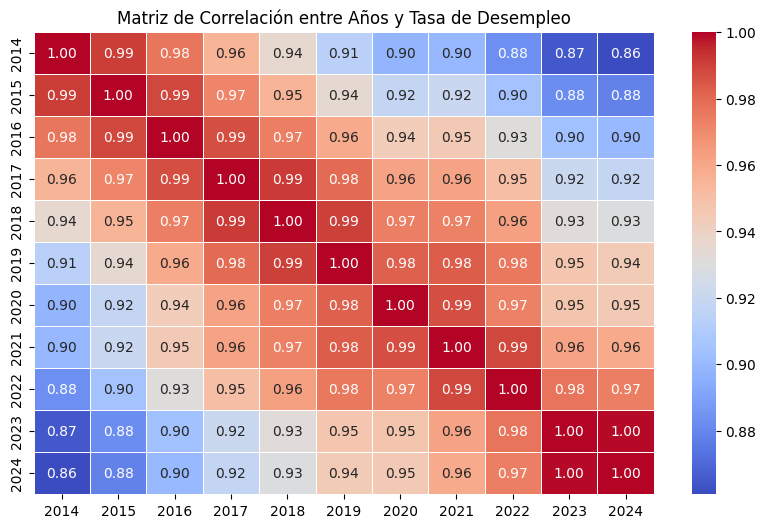

In [26]:
correlation = df[year_columns].corr()

# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Años y Tasa de Desempleo")
plt.show()

#Promedio de desempleo por año

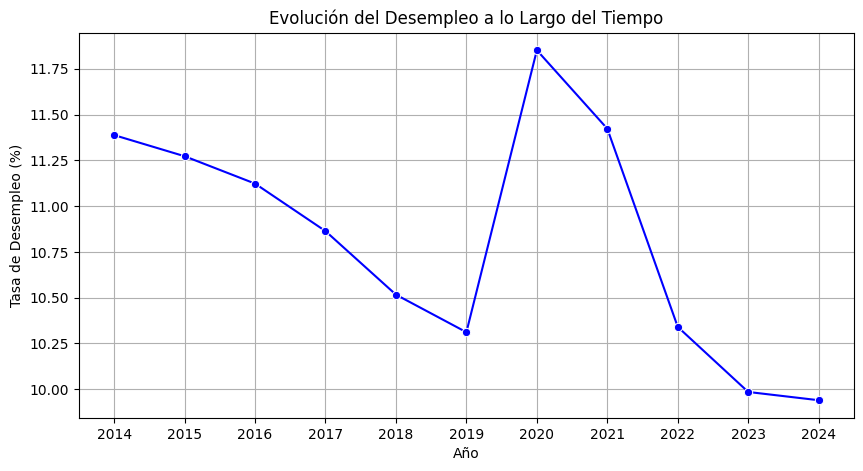

In [27]:
yearly_unemployment = df[year_columns].mean()

# Gráfico de línea
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_unemployment.index, y=yearly_unemployment.values, marker="o", color="blue")
plt.xlabel("Año")
plt.ylabel("Tasa de Desempleo (%)")
plt.title("Evolución del Desempleo a lo Largo del Tiempo")
plt.grid(True)
plt.show()


# Vamos a usar un paquete de prediccion con Machine Learning

### Si lo vas a probar en Google colab llamar al paquete --> 

```
from sklearn.linear_model import LinearRegression
```

In [ ]:
#Descomentar esto si usas Google Colab
#from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression

#Predicción con Machine Learning
### "Ahora haremos un modelo de regresión lineal para predecir la tasa de desempleo en los próximos años usando scikit-learn."

##Prediccion de desempleo para el 2025-2029

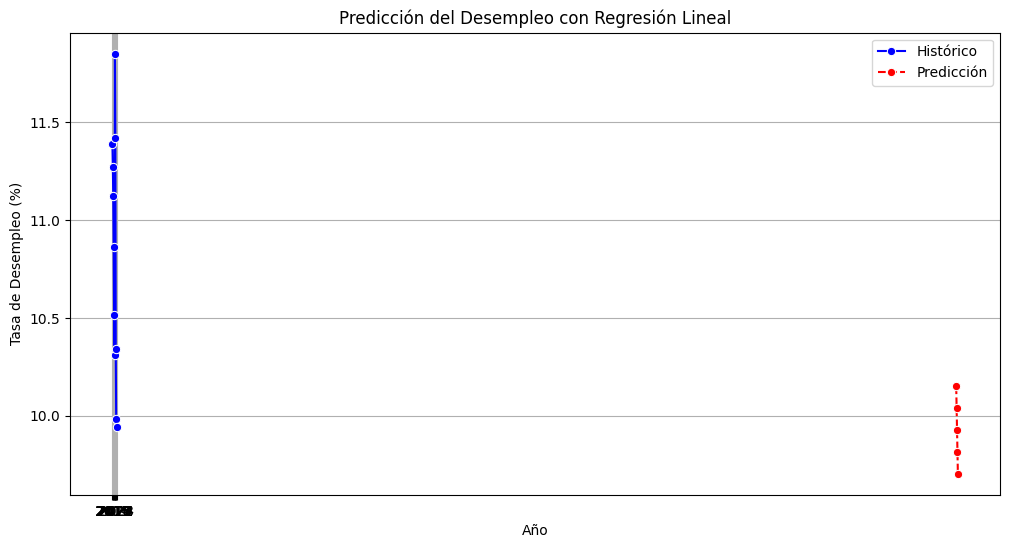

Predicción 2025: 10.15% de desempleo
Predicción 2026: 10.04% de desempleo
Predicción 2027: 9.93% de desempleo
Predicción 2028: 9.81% de desempleo
Predicción 2029: 9.70% de desempleo


In [29]:


# Datos de entrenamiento
X = np.array(range(2014, 2025)).reshape(-1, 1)  # Años como variable independiente
y = yearly_unemployment.values  # Tasa de desempleo como variable dependiente

# Crear modelo y entrenar
modelo = LinearRegression()
modelo.fit(X, y)

# Predicción para los próximos 5 años
futuros_años = np.array(range(2025, 2030)).reshape(-1, 1)
predicciones = modelo.predict(futuros_años)

# Gráfico
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_unemployment.index, y=yearly_unemployment.values, marker="o", color="blue", label="Histórico")
sns.lineplot(x=futuros_años.flatten(), y=predicciones, marker="o", color="red", linestyle="dashed", label="Predicción")
plt.xlabel("Año")
plt.ylabel("Tasa de Desempleo (%)")
plt.title("Predicción del Desempleo con Regresión Lineal")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar predicciones
for año, pred in zip(range(2025, 2030), predicciones):
    print(f"Predicción {año}: {pred:.2f}% de desempleo")

# Estos son las tasas de prediccion para los siguientes años

## Predicción 2025: 10.15% de desempleo
## Predicción 2026: 10.04% de desempleo
## Predicción 2027: 9.93% de desempleo
## Predicción 2028: 9.81% de desempleo
## Predicción 2029: 9.70% de desempleo